# Word2Vec 소개

## 유사한 단어들을 비슷한 방향과 힘의 벡터를 갖도록 변환하여 사용하는 방법
- 1안) 자신의 문장으로 단어별 벡터를 생성한다.
- 2안) 미리 트레이닝된 모델의 벡터를 이용한다.
- 3안) 자신 단어별 벡터와 미리 트레이닝 모델의 벡터를 교차하여 이용한다.<br>
  (보유한 단어사전은 바뀌지 않고 벡터와 교차하여 업데이트된다.)

### 1안

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o') #scatter=산점도 데이터 분석할때 먼저 봐야함... 앤스콤 쿼터?
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [3]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [20]:
# 문장을 이용하여 단어와 벡터를 생성
#model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1) 
model = Word2Vec(sentences, size=3, window=3, min_count=1, workers=1) #차원을 11에서 3으로 줄임
#윈도우는 몇글자 미니멈 카운트는 최소 몇번 나온 단어

In [5]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [6]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [7]:
word_vectors_list

[array([ 0.12341954, -0.00619369,  0.06231251], dtype=float32),
 array([0.0128045 , 0.00284676, 0.08443222], dtype=float32),
 array([ 0.1666634 ,  0.14334671, -0.13406266], dtype=float32),
 array([-0.01083531, -0.1281981 ,  0.0115866 ], dtype=float32),
 array([ 0.01245627, -0.13383137, -0.11930771], dtype=float32),
 array([-0.02947484,  0.11686037, -0.09779219], dtype=float32),
 array([ 0.15417327, -0.03172524, -0.01138133], dtype=float32),
 array([-0.00657403, -0.15609048,  0.04017197], dtype=float32),
 array([ 0.13664256,  0.08398477, -0.1239073 ], dtype=float32),
 array([ 0.05946068,  0.04160393, -0.02267077], dtype=float32),
 array([ 0.07082263,  0.00450019, -0.05049865], dtype=float32)]

In [8]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

-0.48674878

In [9]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

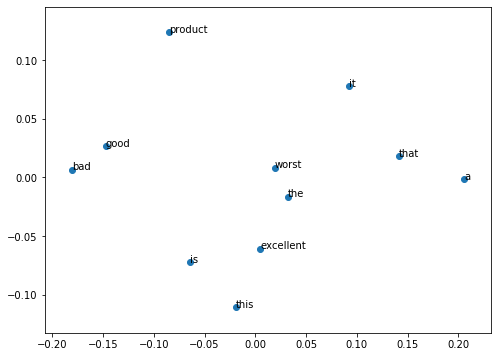

In [10]:
plot_2d_graph(vocabs, xs, ys)

### 3안) 미리 학습된 모델과 병합

In [11]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)
filename = 'data/01_GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [12]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [13]:
len(word_vectors_list)

11

In [14]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386158

In [15]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

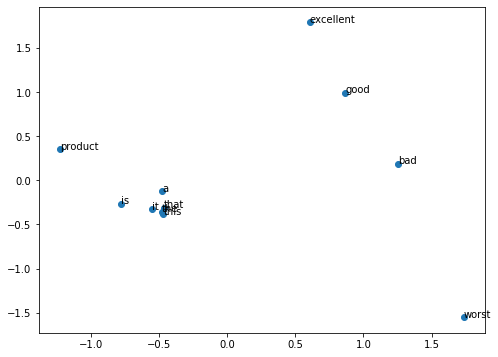

In [16]:
plot_2d_graph(vocabs, xs, ys)

#### 최종 모델 저장

In [17]:
model.save('model/01_word2vec.model')

#### 저장한 모델을 읽어서 사용

In [18]:
del model
word_vectors = model.wv #지우면 에러난다

NameError: name 'model' is not defined

In [19]:
model = Word2Vec.load('model/01_word2vec.model')
word_vectors = model.wv